In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dir = "/content/gdrive/My Drive/Colab Notebooks/SWC/"

In [ ]:
data = pd.read_csv(dir + 'data.csv')
genre_data = pd.read_csv(dir + 'data_w_genres.csv')
year_data = pd.read_csv(dir + 'data_by_year.csv')

In [ ]:
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [ ]:
genre_data

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,[],麥志誠,0.512000,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10,1,2
28676,"['c-pop', 'classic cantopop', 'classic mandopo...",黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9,0,2
28677,[],黃國隆,0.785455,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5,1,11
28678,"['chinese indie', 'chinese indie rock']",黑豹,0.381000,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11,1,2


In [ ]:
year_data

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2016,0.284171,0.600202,221396.510295,0.592855,0.093984,0.181170,-8.061056,0.104313,118.652630,0.431532,59.647190,0
96,1,2017,0.286099,0.612217,211115.696787,0.590421,0.097091,0.191713,-8.312630,0.110536,117.202740,0.416476,63.263554,1
97,1,2018,0.267633,0.663500,206001.007133,0.602435,0.054217,0.176326,-7.168785,0.127176,121.922308,0.447921,63.296243,1
98,1,2019,0.278299,0.644814,201024.788096,0.593224,0.077640,0.172616,-7.722192,0.121043,120.235644,0.458818,65.256542,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

In [ ]:
year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


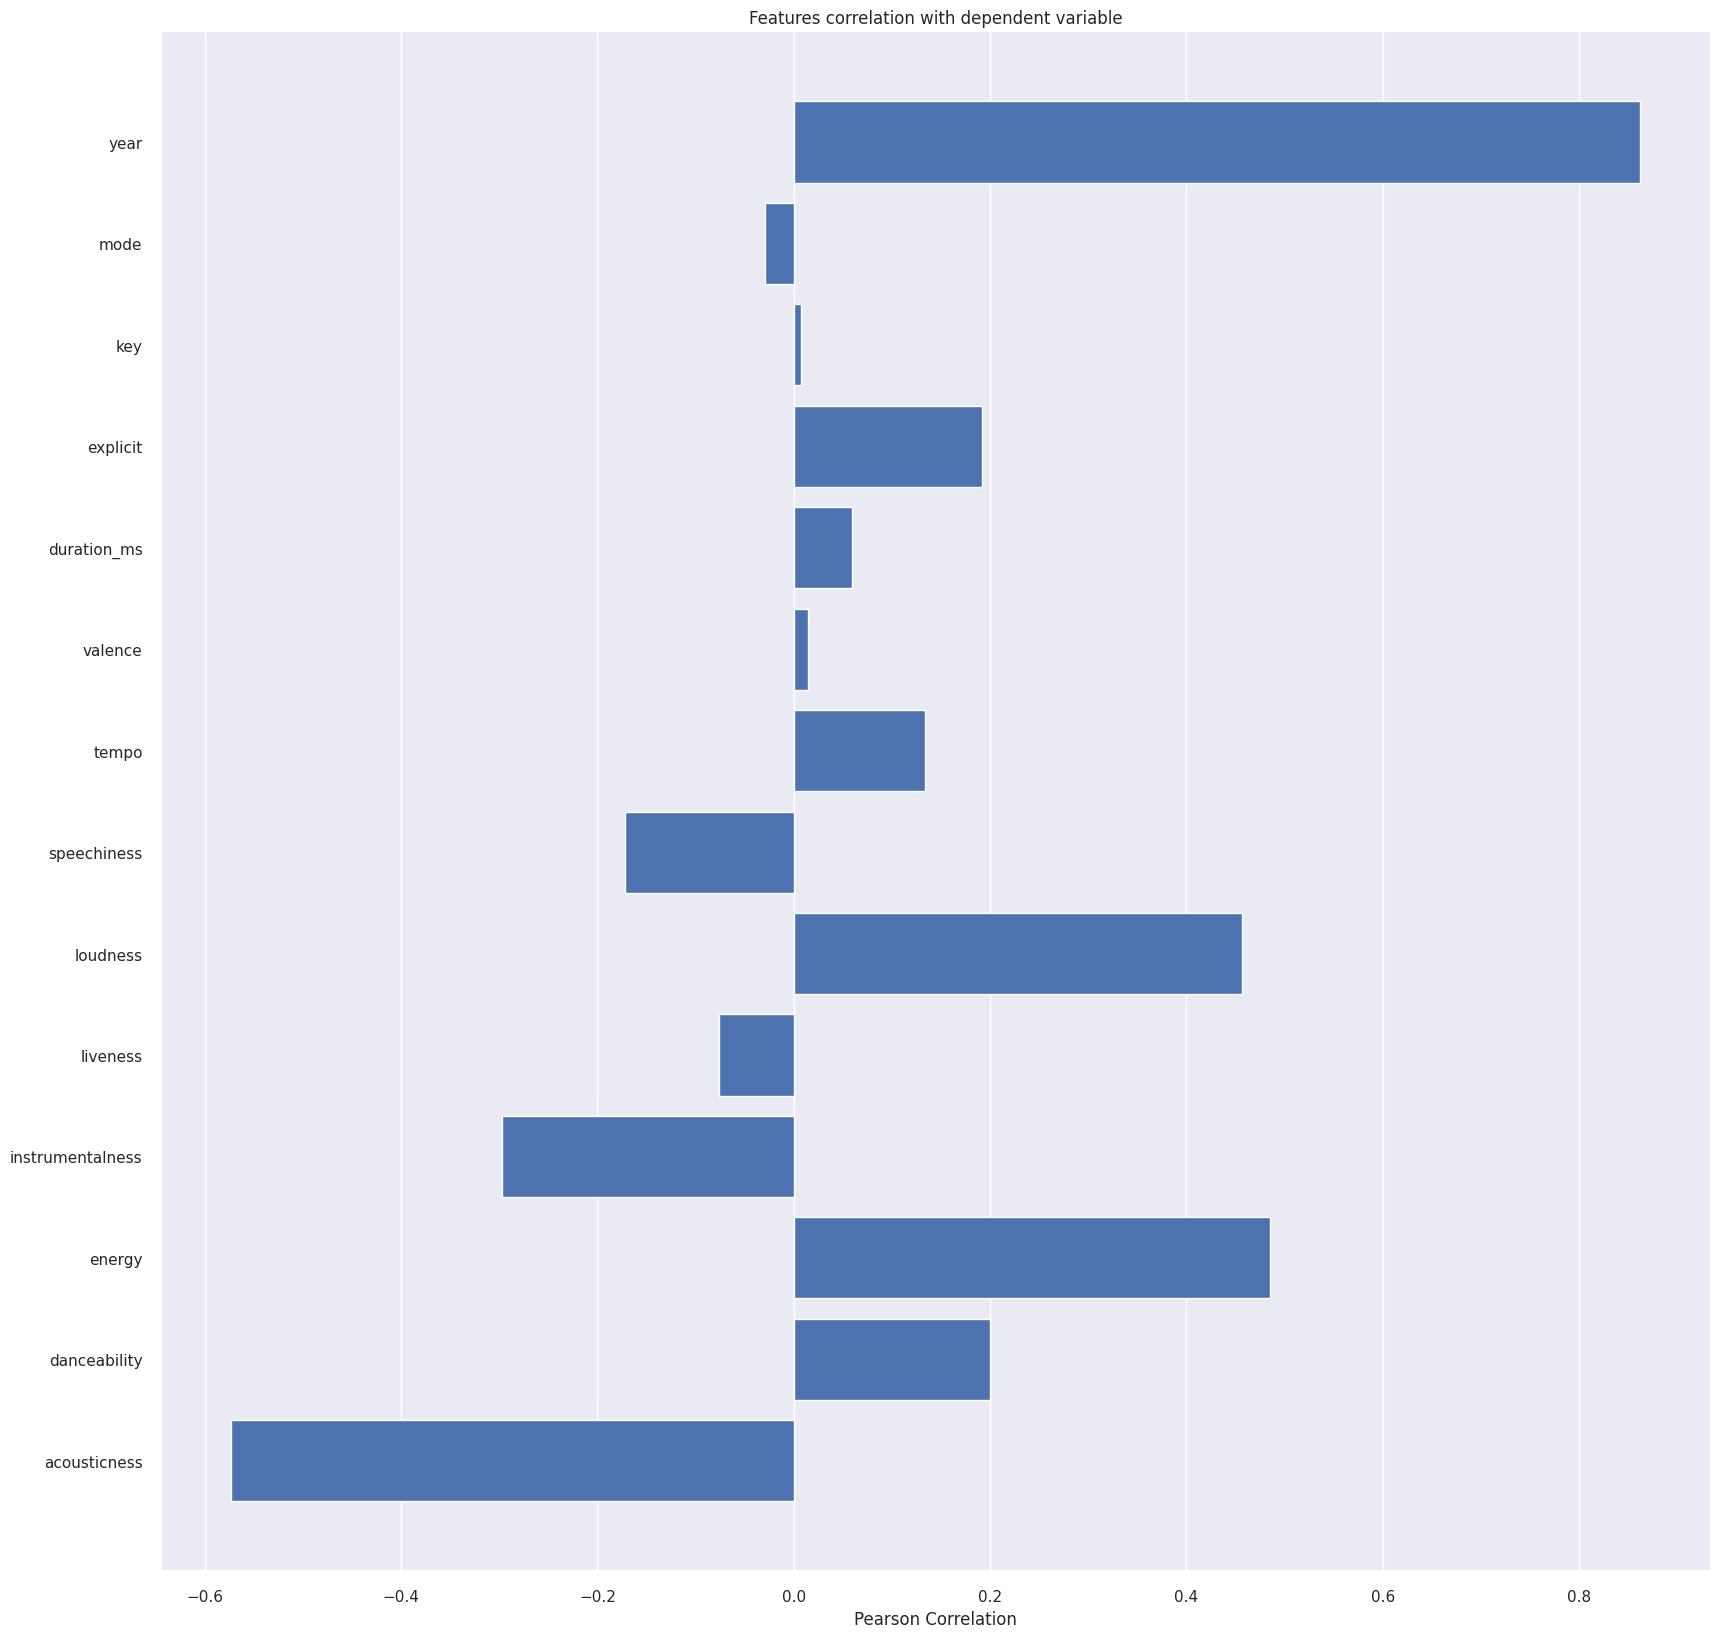

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

In [ ]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)


In [ ]:
data['year'] = pd.to_numeric(data['year'], errors='raise')

In [ ]:
data['decade']

0         1920s
1         1920s
2         1920s
3         1920s
4         1920s
          ...  
170648    2020s
170649    2020s
170650    2020s
170651    2020s
170652    2020s
Name: decade, Length: 170653, dtype: object

In [ ]:
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1920s
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,1920s
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339,1920s
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109,1920s
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,1920s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029,2020s
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936,2020s
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688,2020s
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055,2020s


In [ ]:
print(all(isinstance(item, str) for item in data['decade']))

True


<Axes: xlabel='decade', ylabel='count'>

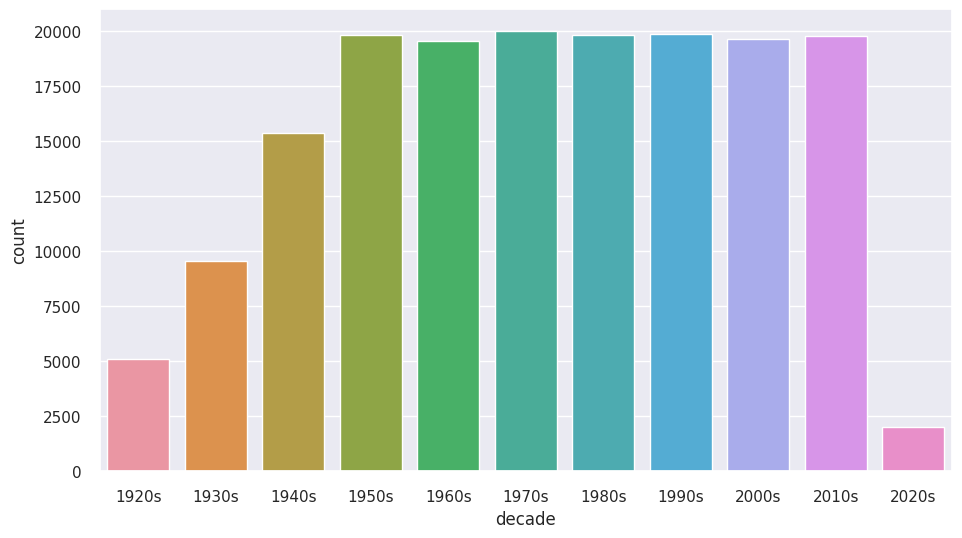

In [ ]:
sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(x='decade',data=data)

In [ ]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence','speechiness']
fig = px.line(year_data, x='year', y=sound_features)
fig.update_layout(
    font=dict(
        size=28,  # Change this value for different font size
    )
)
fig.show()

In [ ]:
top10_per_decade = data.groupby('decade').apply(lambda x: x.nlargest(10, 'popularity')).reset_index(drop=True)

# sound features 리스트
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence','speechiness']
# 각 decade와 sound feature에 대해 평균 값을 계산합니다.
average_features_per_decade = top10_per_decade.groupby('decade')[sound_features].mean().reset_index()

# 이제 각 feature에 대해 선 그래프를 그립니다.
for feature in sound_features:
    fig = px.line(average_features_per_decade, x='decade', y=feature)
    fig.show()

In [ ]:
average_features_per_decade

,decade,acousticness,danceability,energy,instrumentalness,liveness,valence,speechiness
0,1920s,0.887300,0.6383,0.25276,0.265468,0.17897,0.50960,0.05943
1,1930s,0.915900,0.4816,0.27397,0.191403,0.17810,0.43990,0.04363
2,1940s,0.790700,0.4495,0.22748,0.129468,0.29861,0.53590,0.05348
3,1950s,0.800500,0.5421,0.40110,0.000616,0.22484,0.68540,0.06378
4,1960s,0.364710,0.5366,0.56300,0.025854,0.21020,0.68090,0.03662
5,1970s,0.283814,0.5636,0.54790,0.000929,0.13474,0.56900,0.04135
6,1980s,0.162970,0.6188,0.71690,0.003413,0.13380,0.74430,0.04146
7,1990s,0.115325,0.5172,0.61280,0.023843,0.17247,0.40250,0.03727
8,2000s,0.197193,0.6609,0.70360,0.000014,0.22804,0.48210,0.06669
9,2010s,0.417500,0.6307,0.61960,0.000640,0.23913,0.46080,0.08122


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])

X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

In [ ]:
# Visualizing the Clusters with t-SNE

from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']
fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 28680 samples in 0.059s...
[t-SNE] Computed neighbors for 28680 samples in 27.283s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28680
[t-SNE] Computed conditional probabilities for sample 2000 / 28680
[t-SNE] Computed conditional probabilities for sample 3000 / 28680
[t-SNE] Computed conditional probabilities for sample 4000 / 28680
[t-SNE] Computed conditional probabilities for sample 5000 / 28680
[t-SNE] Computed conditional probabilities for sample 6000 / 28680
[t-SNE] Computed conditional probabilities for sample 7000 / 28680
[t-SNE] Computed conditional probabilities for sample 8000 / 28680
[t-SNE] Computed conditional probabilities for sample 9000 / 28680
[t-SNE] Computed conditional probabilities for sample 10000 / 28680
[t-SNE] Computed conditional probabilities for sample 11000 / 28680
[t-SNE] Computed conditional probabilities for sample 12000 / 28680
[t-SNE] Computed conditional probabilities for sa

In [ ]:

fig.update_layout(
    font=dict(
        size=24,  # 이 값을 변경하여 원하는 텍스트 크기로 설정하세요.
    )
)
fig.update_xaxes(title_text='x-tsne')
fig.update_yaxes(title_text='y-tsne')



fig